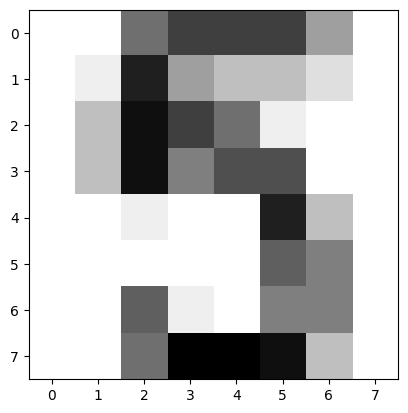

In [29]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

digits = datasets.load_digits()

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
        random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


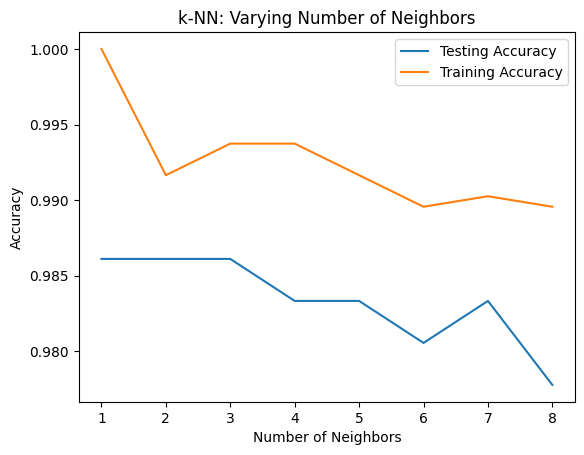

In [32]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [35]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [38]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='', train=True, download=True)

print("Number of training example: ", mnist.train_data.shape)
print("Image information ", mnist[0])

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:36<00:00, 268311.34it/s]


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 107864.58it/s]


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



100%|██████████| 1648877/1648877 [00:47<00:00, 34557.61it/s]


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw

Number of training example:  torch.Size([60000, 28, 28])
Image information  (<PIL.Image.Image image mode=L size=28x28 at 0x1E189804830>, 5)



c:\Users\ungdu\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\datasets\mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


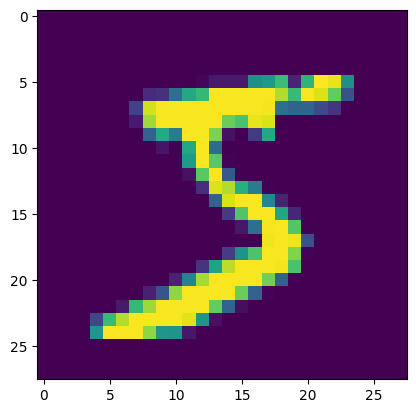

In [39]:
import matplotlib.pyplot  as plt 
%matplotlib inline
plt.imshow(mnist[0][0])

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [41]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root=".", train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [42]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)

            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))  
                
    return net

In [43]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.3197245597839355
Epoch = 0.000000. Batch = 100. Loss = 0.8219529986381531
Epoch = 0.000000. Batch = 200. Loss = 0.47075435519218445
Epoch = 0.000000. Batch = 300. Loss = 0.5079424381256104
Epoch = 0.000000. Batch = 400. Loss = 0.3527185618877411
Epoch = 0.000000. Batch = 500. Loss = 0.35777413845062256
Epoch = 0.000000. Batch = 600. Loss = 0.3684813380241394
Epoch = 0.000000. Batch = 700. Loss = 0.33150333166122437
Epoch = 0.000000. Batch = 800. Loss = 0.2559555172920227
Epoch = 0.000000. Batch = 900. Loss = 0.22856418788433075
Epoch = 1.000000. Batch = 0. Loss = 0.39971423149108887
Epoch = 1.000000. Batch = 100. Loss = 0.4295331835746765
Epoch = 1.000000. Batch = 200. Loss = 0.39123621582984924
Epoch = 1.000000. Batch = 300. Loss = 0.29664257168769836
Epoch = 1.000000. Batch = 400. Loss = 0.43652406334877014
Epoch = 1.000000. Batch = 500. Loss = 0.2781302034854889
Epoch = 1.000000. Batch = 600. Loss = 0.15410958230495453
Epoch = 1.000000. Batch = 

In [44]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9195
Percentage accuracy 91.95


In [45]:
#II. Linear Regression

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\ungdu\Downloads\gapminder.csv')

<Axes: >

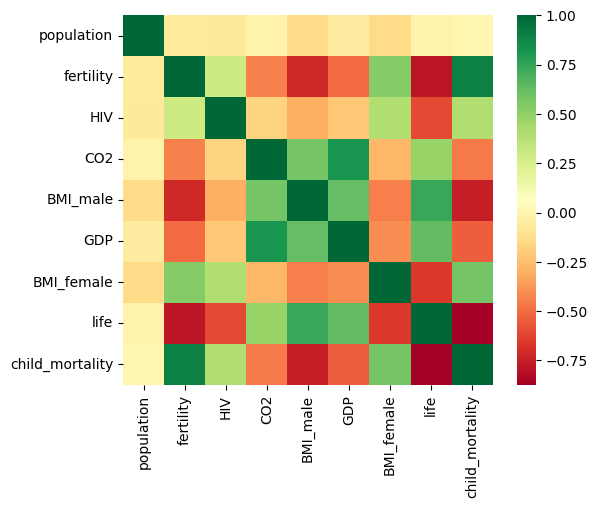

In [48]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

0.6162438752151917


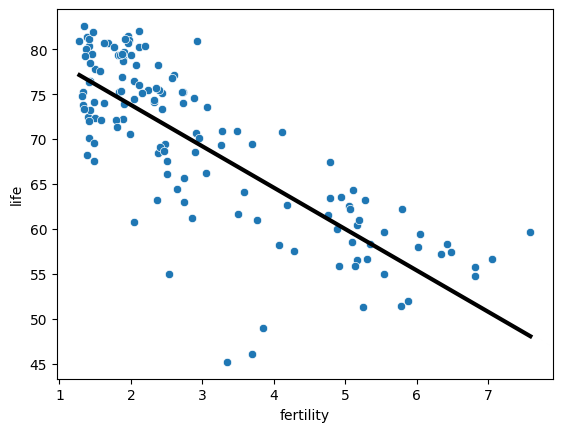

In [49]:
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

X_fertility = df['fertility'].values.reshape(-1, 1)
y = df['life'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size=0.3, random_state=42)

# Create th prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1, 1)

# Fit the model to the data
reg.fit(X_train, y_train)

# compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print $R^2$
print(reg.score(X_fertility, y))

# Plot regression line on scatter plot
sns.scatterplot(x='fertility', y='life', data=df)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)

In [56]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ungdu\Downloads\gapminder.csv')
print(df.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')


In [58]:
features = pd.read_csv(r'C:\Users\ungdu\Downloads\gapminder.csv')
df = pd.read_csv(r'C:\Users\ungdu\Downloads\gapminder.csv')
del features['life']


y_life = df['life'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(x_train, y_train)
print(reg_all.score(features, y_life))

0.8914651485793244


In [59]:
## Linear Regression using PyTorch

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

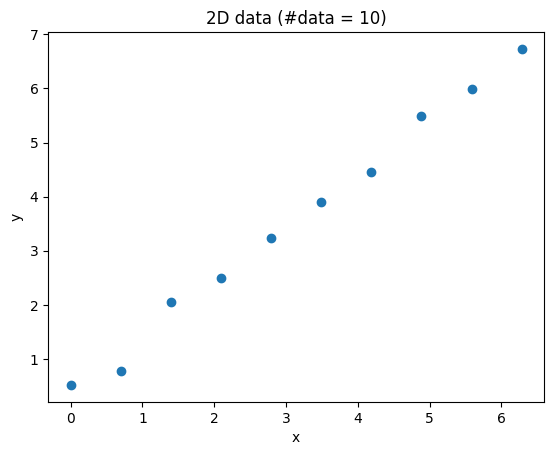

In [61]:
N = 10 # number of data points
m = .9
c = 1
x = np.linspace(0,2*np.pi,N)
y = m*x + c + np.random.normal(0,.3,x.shape)
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()

In [62]:
import torch

In [63]:
# Dataset

In [64]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        sample = {
            'feature': torch.tensor([1,self.x[idx]]), 
            'label': torch.tensor([self.y[idx]])}
        return sample

In [65]:
dataset = MyDataset(x, y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1., 0.], dtype=torch.float64) tensor([0.5186], dtype=torch.float64)
1 tensor([1.0000, 0.6981], dtype=torch.float64) tensor([0.7671], dtype=torch.float64)
2 tensor([1.0000, 1.3963], dtype=torch.float64) tensor([2.0468], dtype=torch.float64)
3 tensor([1.0000, 2.0944], dtype=torch.float64) tensor([2.4962], dtype=torch.float64)
4 tensor([1.0000, 2.7925], dtype=torch.float64) tensor([3.2329], dtype=torch.float64)
5 tensor([1.0000, 3.4907], dtype=torch.float64) tensor([3.9066], dtype=torch.float64)
6 tensor([1.0000, 4.1888], dtype=torch.float64) tensor([4.4570], dtype=torch.float64)
7 tensor([1.0000, 4.8869], dtype=torch.float64) tensor([5.4975], dtype=torch.float64)
8 tensor([1.0000, 5.5851], dtype=torch.float64) tensor([5.9900], dtype=torch.float64)
9 tensor([1.0000, 6.2832], dtype=torch.float64) tensor([6.7306], dtype=torch.float64)


In [66]:
#Dataloader


In [73]:
from torch.utils.data import DataLoader

dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
num_workers = 0
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

In [74]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)


batch# = 0
samples: 
{'feature': tensor([[1.0000, 1.3963],
        [1.0000, 0.0000],
        [1.0000, 4.8869],
        [1.0000, 6.2832]], dtype=torch.float64),
 'label': tensor([[2.0468],
        [0.5186],
        [5.4975],
        [6.7306]], dtype=torch.float64)}

batch# = 1
samples: 
{'feature': tensor([[1.0000, 5.5851],
        [1.0000, 4.1888],
        [1.0000, 0.6981],
        [1.0000, 2.7925]], dtype=torch.float64),
 'label': tensor([[5.9900],
        [4.4570],
        [0.7671],
        [3.2329]], dtype=torch.float64)}

batch# = 2
samples: 
{'feature': tensor([[1.0000, 3.4907],
        [1.0000, 2.0944]], dtype=torch.float64),
 'label': tensor([[3.9066],
        [2.4962]], dtype=torch.float64)}


In [75]:
#model


In [76]:
import torch.nn as nn
import torch.nn.functional as F
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [77]:
### Setting a model for our problem

In [78]:
    input_dim = 2
    output_dim = 1

    model = MyModel(input_dim, output_dim)

In [79]:
## Cost function

#Often called loss or error

In [80]:
cost = nn.MSELoss()

In [81]:
## Minimizing the cost function

#In other words training (or learning from data)

In [88]:
import torch
from torch.utils.data import DataLoader

num_epochs = 10
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr=l_rate) 

# Assuming MyDataset is a properly defined PyTorch Dataset
dataset = MyDataset(x, y)
batch_size = 4
shuffle = True
# Set num_workers to 0 for debugging purposes
num_workers = 0
training_sample_generator = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    try:
        for batch_i, samples in enumerate(training_sample_generator):
            predictions = model(samples['feature'])
            error = cost(predictions, samples['label'])
            print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
            
            optimiser.zero_grad()
            error.backward()
            optimiser.step()
    except Exception as e:
        print(f"An exception occurred: {e}")
        # Handle the exception e.g., by logging it or passing it


Epoch = 0
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 1
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 2
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 3
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 4
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 5
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 6
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 7
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 8
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float
Epoch = 9
An exception occurred: mat1 and mat2 must have the same dtype, but got Double and Float


In [89]:
import pandas as pd

df = pd.read_csv(r'C:\Users\ungdu\Downloads\gapminder.csv')
print(df.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')


In [90]:
## Lets see how well the model has learnt the data

In [86]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape), x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape:', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape:', y_for_plotting.shape)

Design matrix shape: torch.Size([1000, 2])
y_for_plotting shape: torch.Size([1000, 1])


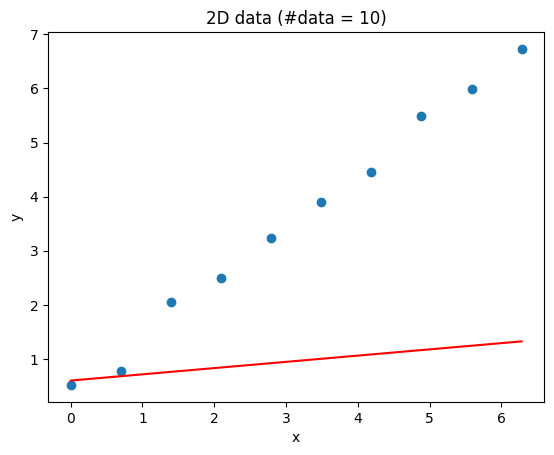

In [91]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy(), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' % N)
plt.show()